In [2]:
import pandas as pd
import math
import matplotlib.pyplot as plt


df = pd.read_csv('D:/ir/assignment2/Q3/IR-assignment-2-data (2).txt',header=None)
df.index=range(0,len(df))
df.columns=['Col1']
df=df['Col1'].str.split(' ',expand=True)
print(df)


       0          1    2    3    4    5    6    7          8           9    \
0        0      qid:4  1:3  2:0  3:2  4:0  5:3  6:1        7:0  8:0.666667   
1        0      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
2        0      qid:4  1:3  2:0  3:2  4:0  5:3  6:1        7:0  8:0.666667   
3        0      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
4        1      qid:4  1:3  2:0  3:3  4:0  5:3  6:1        7:0         8:1   
...     ..        ...  ...  ...  ...  ...  ...  ...        ...         ...   
239088   0  qid:29989  1:2  2:0  3:1  4:1  5:2  6:1        7:0   8:0.50000   
239089   0  qid:29989  1:2  2:0  3:1  4:0  5:2  6:1        7:0   8:0.50000   
239090   1  qid:29989  1:2  2:0  3:2  4:2  5:2  6:1        7:0         8:1   
239091   1  qid:29989  1:2  2:0  3:2  4:0  5:2  6:1        7:0         8:1   
239092   0  qid:29989  1:2  2:1  3:1  4:1  5:2  6:1  7:0.50000   8:0.50000   

        ...       129     130        131        132      133   

In [3]:
df = df[df[1] == 'qid:4']
header = None
print(df)

    0      1    2    3    4    5    6           7    8           9    ...  \
0     0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
1     0  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
2     0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
3     0  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
4     1  qid:4  1:3  2:0  3:3  4:0  5:3         6:1  7:0         8:1  ...   
..   ..    ...  ...  ...  ...  ...  ...         ...  ...         ...  ...   
98    0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   
99    1  qid:4  1:3  2:0  3:3  4:2  5:3         6:1  7:0         8:1  ...   
100   2  qid:4  1:2  2:0  3:2  4:0  5:2  6:0.666667  7:0  8:0.666667  ...   
101   1  qid:4  1:2  2:0  3:2  4:0  5:2  6:0.666667  7:0  8:0.666667  ...   
102   0  qid:4  1:3  2:0  3:2  4:0  5:3         6:1  7:0  8:0.666667  ...   

          129     130        131        132      133      134    135      1

In [4]:
df1= df.sort_values(by=[0],ascending=False)

Calculating Max DCG value

In [5]:
maxDcg=0
relevence=0
for i in range(df1.shape[0]):
    relevence=float(df1.iloc[i,0])
    if(i==0):
        maxDcg = relevence
    else:
        maxDcg = maxDcg + (relevence/(math.log2(i+1)))
    

In [6]:
maxDcg

20.989750804831445

calculating DCG value

In [7]:
Dcg=0
for i in range(df.shape[0]):
    relevence=float(df.iloc[i,0])
    if(i==0):
        Dcg=relevence
    else:
        Dcg= Dcg + (relevence/(math.log2(i+1)))

In [8]:
Dcg

12.550247459532576

In [9]:
dis_unique_values = df[0].unique()

Num_of_docs = 1
for value in dis_unique_values:
    #find the individual total number of rows which contains each unique value
    total_number_of_rows= len(df[df[0]==value]) 
    print("Number of rows with", value)
    print(":",total_number_of_rows)
    #add all the given output to find the file rearranging the query-url pairs in order of max DCG
    Num_of_docs =  Num_of_docs * math.factorial(total_number_of_rows)

print("total number of files: ",Num_of_docs)

Number of rows with 0
: 59
Number of rows with 1
: 26
Number of rows with 3
: 1
Number of rows with 2
: 17
total number of files:  19893497375938370599826047614905329896936840170566570588205180312704857992695193482412686565431050240000000000000000000000


calculating NDCG value

In [10]:
nDcg = Dcg/maxDcg

Normalize DCG of whole dataset

In [11]:
nDcg

0.5979226516897831

Normalize DCG of first 50 rows

In [12]:
df_50 = df.iloc[:50]

In [13]:
df_50
# print(range(df_50.shape[0]))

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
0,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:9,130:124,131:4678,132:54,133:74,134:0,135:0,136:0,
1,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:0,129:8,130:122,131:508,132:131,133:136,134:0,135:0,136:0,
2,0,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:2,129:8,130:115,131:508,132:51,133:70,134:0,135:0,136:0,
3,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:82,129:17,130:122,131:508,132:83,133:107,134:0,135:10,136:13.35,
4,1,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:11,129:8,130:121,131:508,132:103,133:120,134:0,135:0,136:0,
5,0,qid:4,1:3,2:1,3:2,4:1,5:3,6:1,7:0.333333,8:0.666667,...,128:82,129:7,130:123,131:4262,132:47,133:79,134:0,135:4,136:6.68,
6,1,qid:4,1:3,2:0,3:1,4:1,5:3,6:1,7:0,8:0.333333,...,128:22,129:2,130:256,131:9102,132:28,133:23,134:0,135:0,136:0,
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,
8,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:766,129:0,130:119,131:32560,132:45,133:24,134:0,135:0,136:0,
9,0,qid:4,1:3,2:0,3:3,4:0,5:3,6:1,7:0,8:1,...,128:367,129:8,130:266,131:398,132:89,133:114,134:0,135:0,136:0,


DCG for 50 docs

In [14]:
Dcg_50=0
for i in range(df_50.shape[0]):
    relevence=float(df_50.iloc[i,0])
    if(i==0):
        Dcg_50=relevence
    else:
        Dcg_50= Dcg_50 + (relevence/(math.log2(i+1)))

Dcg_50

7.390580969258021

In [15]:
df1_50 =df1.iloc[:50]

In [16]:
df1_50

,0,1,2,3,4,5,6,7,8,9,...,129,130,131,132,133,134,135,136,137,138
7,3,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:349,129:8,130:123,131:281,132:22,133:6,134:0,135:0,136:0,
76,2,qid:4,1:2,2:0,3:1,4:0,5:2,6:0.666667,7:0,8:0.333333,...,128:0,129:0,130:2417,131:721,132:14,133:113,134:0,135:13,136:47.9,
40,2,qid:4,1:3,2:2,3:2,4:0,5:3,6:1,7:0.666667,8:0.666667,...,128:8,129:3,130:1888,131:9338,132:3,133:11,134:0,135:0,136:0,
36,2,qid:4,1:3,2:0,3:2,4:0,5:3,6:1,7:0,8:0.666667,...,128:0,129:2,130:12028,131:11379,132:26,133:24,134:0,135:77,136:23.9595223404047,
90,2,qid:4,1:3,2:0,3:3,4:3,5:3,6:1,7:0,8:1,...,128:27,129:0,130:814,131:13555,132:108,133:113,134:0,135:0,136:0,
25,2,qid:4,1:3,2:0,3:3,4:1,5:3,6:1,7:0,8:1,...,128:2664,129:0,130:5753,131:11746,132:8,133:68,134:0,135:0,136:0,
37,2,qid:4,1:2,2:0,3:2,4:0,5:2,6:0.666667,7:0,8:0.666667,...,128:0,129:0,130:16417,131:9338,132:29,133:29,134:6,135:68,136:28.1902038750723,
22,2,qid:4,1:3,2:1,3:3,4:0,5:3,6:1,7:0.333333,8:1,...,128:189,129:8,130:144,131:4307,132:82,133:108,134:0,135:0,136:0,
21,2,qid:4,1:3,2:1,3:3,4:2,5:3,6:1,7:0.333333,8:1,...,128:8,129:5,130:144,131:395,132:13,133:56,134:0,135:0,136:0,
19,2,qid:4,1:3,2:0,3:2,4:1,5:3,6:1,7:0,8:0.666667,...,128:553,129:2,130:876,131:10008,132:42,133:45,134:0,135:0,136:0,


Max DCG for 50 docs

In [17]:
maxDcg_50=0
relevence=0
for i in range(df1_50.shape[0]):
    relevence=float(df1_50.iloc[i,0])
    if(i==0):
        maxDcg_50 = relevence
    else:
        maxDcg_50 = maxDcg_50 + (relevence/(math.log2(i+1)))

maxDcg_50

20.989750804831445

NDCG for 50 docs

In [18]:
Ndcg_50 = Dcg_50/maxDcg_50

In [19]:
Ndcg_50

0.3521042740324887

Precision and Recall calculation

In [20]:
total_rows = len(df.index)
data = {}  
for i in range(0,total_rows):
        
    s = float(df.at[i,76][3:])  
    temp = (s,df.at[i,0])
    data[i] = (temp)

In [21]:
plot_data = sorted(data.items(), key = lambda x:(x[1], x[0]), reverse = True)

In [22]:
count=0
for i in range(len(plot_data)):
    if(plot_data[i][1][1] == '0'):
        count=count+1

total_relevent_retrived = 103 -count

total_relevent_retrived

44

In [23]:
precision = []
recall = []
relative_count = 0

for i in range(len(plot_data)):
    if plot_data[i][1][1] > '0':
        relative_count += 1
    precision.append(relative_count/(i+1))
    recall.append(relative_count/total_relevent_retrived)

Text(0, 0.5, 'Precision')

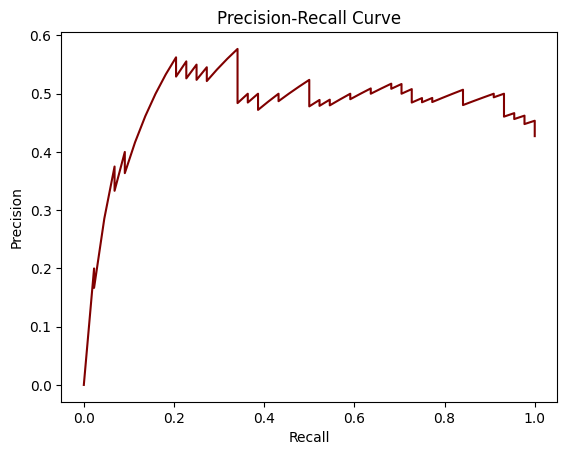

In [24]:
plt.plot(recall, precision,color='maroon')
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")